In [1]:
%matplotlib notebook
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
from scipy.stats import linregress
import scipy.stats as stats
from scipy.stats import chisquare
import numpy as np
import pandas as pd

In [3]:
Geo_Data = "C:\\UPenn\\Wildfire Project\\Wildfire Project\\100K_acre_fires.csv"

In [4]:
Geo_Data_df = pd.read_csv(Geo_Data)

In [5]:
Geo_Data_df

,Year,Fire Name,# of Fires (if applicable,State,Total Acres,Avg Acres
0,1997,Inowak,1,AK,610000.0,610000.00000
1,1999,Big Bar Complex,2,CA,140948.0,70474.00000
2,1999,Mule Butte,1,ID,138220.0,138220.00000
3,1999,Dun Glen Complex,9,NV,361658.0,40184.22222
4,1999,Sadler Complex,1,NV,297000.0,297000.00000
...,...,...,...,...,...,...
211,2019,Black River,1,AK,107078.0,107078.00000
212,2019,North River,1,AK,101451.0,101451.00000
213,2019,Woodbury,1,AZ,123875.0,123875.00000
214,2019,Sheep,1,ID,112106.0,112106.00000


In [6]:
Grouped_USA_df = Geo_Data_df.groupby(['State'])

print (Grouped_USA_df)

Grouped_USA_df.count()

,Year,Fire Name,# of Fires (if applicable,Total Acres,Avg Acres
State,,,,,
AK,65,65,65,65,65
AZ,6,6,6,6,6
CA,24,24,24,24,24
CO,2,2,2,2,2
FL,1,1,1,1,1
GA,5,5,5,5,5
ID,28,28,28,28,28
MT,11,11,11,11,11
NM,4,4,4,4,4


In [7]:
Grouped_USA_df['Avg Acres'].apply(pd.to_numeric)
Acerage_Fire = Grouped_USA_df['Avg Acres'].median()
Acerage_Fire

State
AK    164542.0
AZ    173414.5
CA    156956.5
CO    122902.5
FL    108574.0
GA    152515.0
ID    118553.0
MT     90000.0
NM    147569.5
NV    110827.0
OK    326968.0
OR    108154.0
TX    162625.0
UT    107846.0
WA    145282.0
WY     68800.0
Name: Avg Acres, dtype: float64

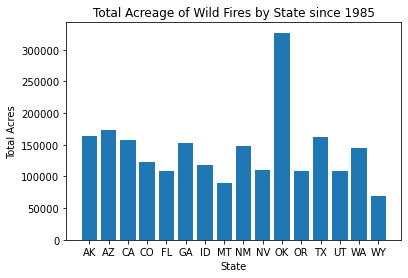

In [8]:
plt.bar(Acerage_Fire.index.values,Acerage_Fire.values)
plt.xlabel("State")
plt.ylabel("Total Acres")
plt.title("Total Acreage of Wild Fires by State since 1985")
plt.show()

In [9]:
Area_data = "C:\\UPenn\\Wildfire Project\\Wildfire Project\\State Area Measurements.csv"

In [10]:
Area_data_df = pd.read_csv(Area_data)

In [11]:
Area_data_df

,States,Sq. Mi.,Acres
0,AK,94743,60635520
1,AZ,396,253440
2,CA,7916,5066240
3,CO,701,448640
4,FL,12133,7765120
5,GA,1912,1223680
6,ID,926,592640
7,MT,1494,956160
8,NV,791,506240
9,NM,292,186880


In [12]:
Area_data_df["Acres Burned"]= Acerage_Fire.values

In [13]:
Area_data_df["Percentage Burned"]=Area_data_df["Acres Burned"]/Area_data_df["Acres"]
Area_data_df

,States,Sq. Mi.,Acres,Acres Burned,Percentage Burned
0,AK,94743,60635520,164542.0,0.002714
1,AZ,396,253440,173414.5,0.684243
2,CA,7916,5066240,156956.5,0.030981
3,CO,701,448640,122902.5,0.273945
4,FL,12133,7765120,108574.0,0.013982
5,GA,1912,1223680,152515.0,0.124636
6,ID,926,592640,118553.0,0.200042
7,MT,1494,956160,90000.0,0.094127
8,NV,791,506240,147569.5,0.291501
9,NM,292,186880,110827.0,0.593038


In [14]:
Area_data_df["Expected Percentage"] = Area_data_df["Percentage Burned"].mean()

In [15]:
((Area_data_df["Percentage Burned"]- Area_data_df["Expected Percentage"])**2/Area_data_df["Percentage Burned"]).sum()

18.797603491891895

In [16]:
chi_square_df = Area_data_df [["Percentage Burned", "Expected Percentage"]]
critical_value = stats.chi2.ppf(q = 0.95, df=15)
stats.chisquare(chi_square_df["Percentage Burned"], chi_square_df["Expected Percentage"])

Power_divergenceResult(statistic=3.3765918705166422, pvalue=0.9991700155518832)

In [17]:
critical_value

24.995790139728616

<Figure size 432x288 with 0 Axes>

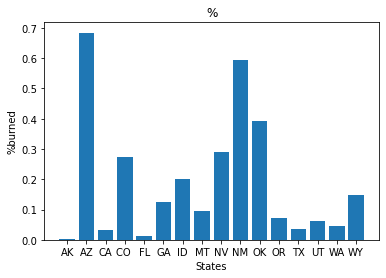

<Figure size 432x288 with 0 Axes>

In [18]:
plt.bar(Area_data_df["States"],Area_data_df["Percentage Burned"])
plt.xlabel("States")
plt.ylabel("%burned")
plt.title("%")
plt.figure()


In [19]:
chi_square_df

,Percentage Burned,Expected Percentage
0,0.002714,0.19151
1,0.684243,0.19151
2,0.030981,0.19151
3,0.273945,0.19151
4,0.013982,0.19151
5,0.124636,0.19151
6,0.200042,0.19151
7,0.094127,0.19151
8,0.291501,0.19151
9,0.593038,0.19151
